In [146]:
import numpy as np
import sympy as sp

In [147]:
t1,p1,t2,p2=sp.symbols('\\theta_1 \\phi_1 \\theta_2 \\phi_2') # For latex
x1,y1,z1=sp.cos(p1)*sp.sin(t1),sp.sin(p1)*sp.sin(t1),sp.cos(t1)
x2,y2,z2=sp.cos(p2)*sp.sin(t2),sp.sin(p2)*sp.sin(t2),sp.cos(t2)


from sympy.vector import CoordSys3D
N = CoordSys3D('N')
d1=x1*N.i+y1*N.j+z1*N.k
d2=x2*N.i+y2*N.j+z2*N.k

In [148]:
Ux_symbolic=(d1.dot(d2)-3*d1.dot(N.i)*d2.dot(N.i)).simplify()
Uy_symbolic=(d1.dot(d2)-3*d1.dot(N.j)*d2.dot(N.j)).simplify()
Uz_symbolic=(d1.dot(d2)-3*d1.dot(N.k)*d2.dot(N.k)).simplify()
sp.init_printing()
Ux_symbolic,Uy_symbolic,Uz_symbolic

In [149]:
def create_spehircal_mesh_points(n):
    t=np.linspace(0,2*np.pi,n)
    p=np.linspace(0,np.pi,n)
    return np.meshgrid(t,p)

nk=31
points=create_spehircal_mesh_points(nk)

In [150]:
import matplotlib.pyplot as plt

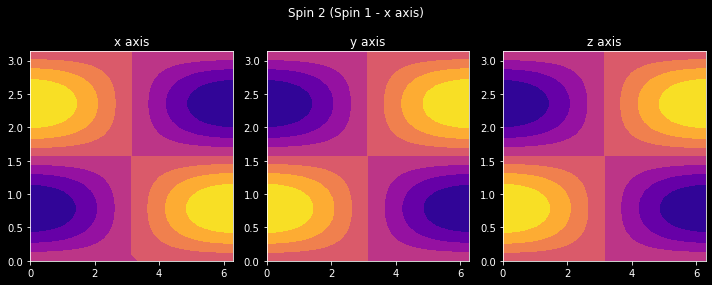

In [151]:

P1={t1:sp.pi/2,p1:0} #Spin 1 pointing along x axis

Ux=sp.lambdify((t2,p2),Ux_symbolic.subs(P1))
Uy=sp.lambdify((t2,p2),Uy_symbolic.subs(P1))
Uz=sp.lambdify((t2,p2),Uz_symbolic.subs(P1))

fig,ax=plt.subplots(1,3,figsize=(10,4))

ax[0].contourf(*points,np.array([Ux(i,j) for i,j in zip(*points)]).reshape(nk,nk).T,cmap="plasma")
ax[1].contourf(*points,np.array([Uy(i,j) for i,j in zip(*points)]).reshape(nk,nk).T,cmap="plasma")
ax[2].contourf(*points,np.array([Uz(i,j) for i,j in zip(*points)]).reshape(nk,nk).T,cmap="plasma")

fig.suptitle("Spin 2 (Spin 1 - x axis)")

for j,i in enumerate(ax):i.set_title("{axis} axis".format(axis=["x","y","z"][j]))
plt.tight_layout()

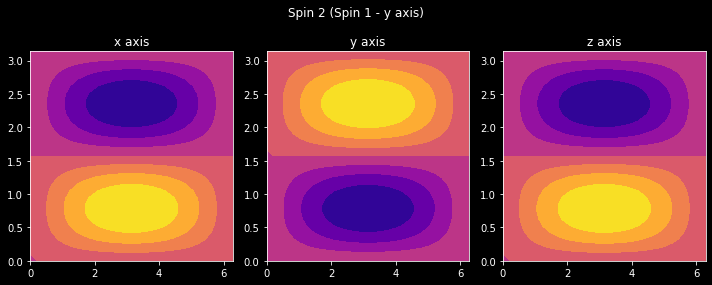

In [152]:

P1={t1:sp.pi/2,p1:sp.pi/2} #Spin 1 pointing along y axis

Ux=sp.lambdify((t2,p2),Ux_symbolic.subs(P1))
Uy=sp.lambdify((t2,p2),Uy_symbolic.subs(P1))
Uz=sp.lambdify((t2,p2),Uz_symbolic.subs(P1))

fig,ax=plt.subplots(1,3,figsize=(10,4))

ax[0].contourf(*points,np.array([Ux(i,j) for i,j in zip(*points)]).reshape(nk,nk).T,cmap="plasma")
ax[1].contourf(*points,np.array([Uy(i,j) for i,j in zip(*points)]).reshape(nk,nk).T,cmap="plasma")
ax[2].contourf(*points,np.array([Uz(i,j) for i,j in zip(*points)]).reshape(nk,nk).T,cmap="plasma")

fig.suptitle("Spin 2 (Spin 1 - y axis)")

for j,i in enumerate(ax):i.set_title("{axis} axis".format(axis=["x","y","z"][j]))
plt.tight_layout()

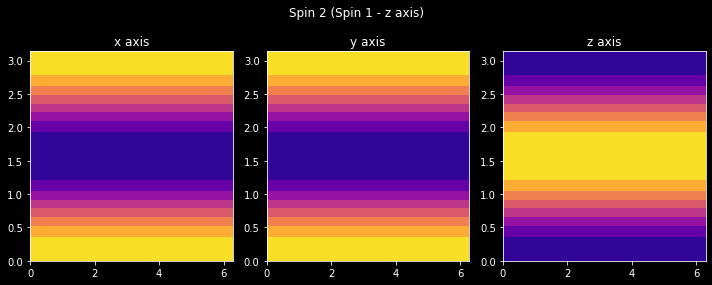

In [153]:

P1={t1:0,p1:0} #Spin 1 pointing along z axis

Ux=sp.lambdify((t2,p2),Ux_symbolic.subs(P1))
Uy=sp.lambdify((t2,p2),Uy_symbolic.subs(P1))
Uz=sp.lambdify((t2,p2),Uz_symbolic.subs(P1))

fig,ax=plt.subplots(1,3,figsize=(10,4))

ax[0].contourf(*points,np.array([Ux(i,j) for i,j in zip(*points)]).reshape(nk,nk).T,cmap="plasma")
ax[1].contourf(*points,np.array([Uy(i,j) for i,j in zip(*points)]).reshape(nk,nk).T,cmap="plasma")
ax[2].contourf(*points,np.array([Uz(i,j) for i,j in zip(*points)]).reshape(nk,nk).T,cmap="plasma")

fig.suptitle("Spin 2 (Spin 1 - z axis)")

for j,i in enumerate(ax):i.set_title("{axis} axis".format(axis=["x","y","z"][j]))
plt.tight_layout()